In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign"

In [3]:
df_phish = pd.read_csv("result_logo_long2.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_logo_benign.txt", sep="\t")
df_benign["is_phish"] = 0

#df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_78892/4068947874.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_78892/4068947874.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (17456, 7)
Legit sites: (13465, 7)
Dataframe sites: (30921, 7)


In [5]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [6]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,12346,1119,13465
1,3438,14018,17456
All,15784,15137,30921


In [7]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,12346,1119,13465
1,3777,13679,17456
All,16123,14798,30921


In [8]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.9260751800224615, Precision brand: 0.9243816731990809
Sensitivity: 0.8030476626947755, Sensitivity brand: 0.7836274060494959


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(3438, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/WeTransfer+328/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Societe Generale+328/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/DocuSign+237/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Standard Chartered Bank+293/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Deutsche Telekom+58/shot.png']

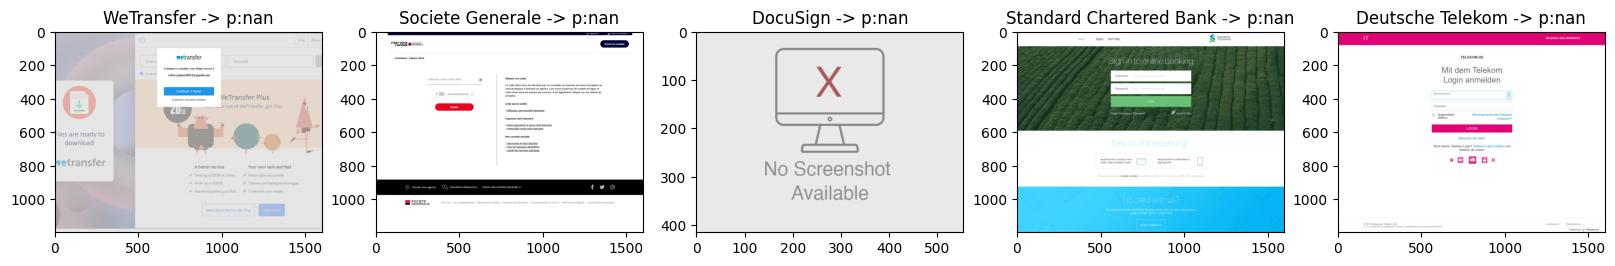

In [21]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(1119, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/rr1---sn-30a7ynek.gvt1.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/rr3---sn-uxax4vopj5qx-cxge.googlevideo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/r7---sn-2uuxa3vh-jb3ez.googlevideo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/rr4.sn-5ualdnll.googlevideo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/fm.tuba.pl/shot.png']

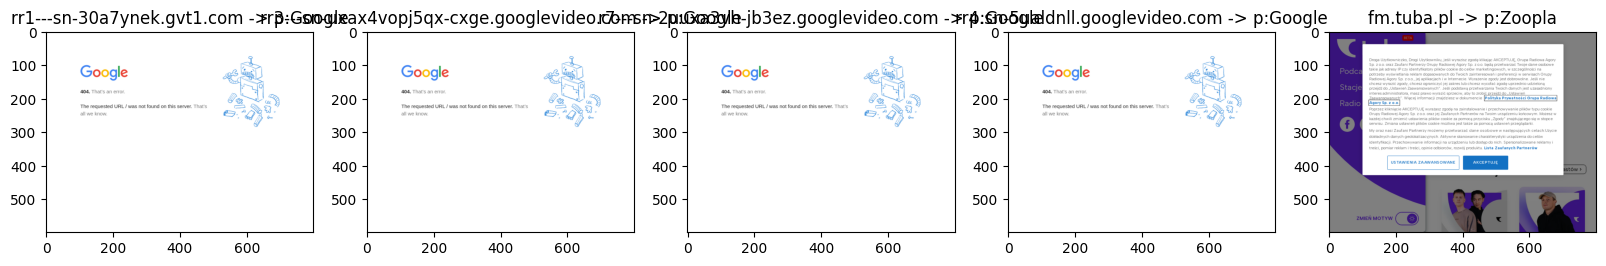

In [40]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(339, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Microsoft+60/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/OneDrive+132/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Microsoft+26/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Google+25/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/OneDrive+362/shot.png']

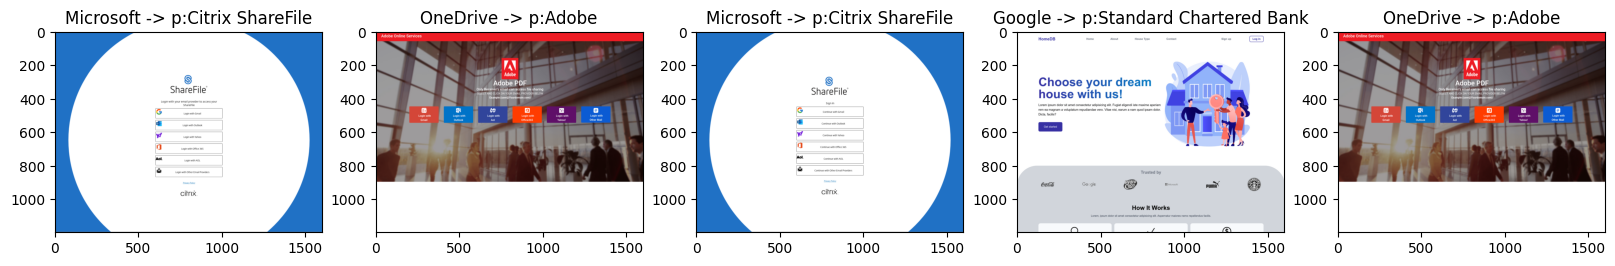

In [37]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "own_dataset_phish_long2/American Express+215/shot.png",
    "own_dataset_phish_long2/GoDaddy+142/shot.png",
    "own_dataset_phish_long2/Societe Generale+130/shot.png",
    "own_dataset_phish_long2/DocuSign+453/shot.png",
    "own_dataset_phish_long2/Deutsche Telekom+387/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+293/shot.png",
    "own_dataset_phish_long2/Blockchain+353/shot.png",
    "own_dataset_phish_long2/American Express+120/shot.png"
]

examples_fp = [
    "own_dataset_benign/rr1---sn-i5heen7r.gvt1.com/shot.png",
    "own_dataset_benign/uncg.edu/shot.png",
    "own_dataset_benign/cognito-identity.ca-central-1.amazonaws.com/shot.png",
    "own_dataset_benign/rr1---sn-pmcg-bg0s.googlevideo.com/shot.png",
    "own_dataset_benign/delta206.rtb.appier.net/shot.png",
    "own_dataset_benign/ideal.bunq.com/shot.png",
    "own_dataset_benign/fm.tuba.pl/shot.png",
    "own_dataset_benign/www.metrotransit.org/shot.png"
]

examples_false_brand = [
    "own_dataset_phish_long2/Interac+56/shot.png",
    "own_dataset_phish_long2/PostFinance+312/shot.png",
    "own_dataset_phish_long2/WeTransfer+383/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+180/shot.png",
    "own_dataset_phish_long2/PostFinance+395/shot.png",
    "own_dataset_phish_long2/Leboncoin+372/shot.png",
    "own_dataset_phish_long2/Blockchain+122/shot.png",
    "own_dataset_phish_long2/Google+25/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {14018}
\def \cFP {1119}
\def \cTN {12346}
\def \cFN {3438}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {15137}
\def \cFpN {15784}
\def \ctotal {30921}
\def \cPPV {92.6\%}
\def \cTPR {80.3\%}
\def \cACC {85.3\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {13679}
\def \cFP {1119}
\def \cTN {12346}
\def \cFN {3777}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {14798}
\def \cFpN {16123}
\def \ctotal {30921}
\def \cPPV {92.4\%}
\def \cTPR {78.4\%}
\def \cACC {84.2\%}

